<h3> Coding Logicstic Regression </h3>

In [1]:
# importing dataset : Health experiment based on age and physical test scores
# Passing test is '1' while not passing is '0' in the test_result column

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./Datasets/experiment.csv')

In [2]:
data.sample(10)

,age,physical_score,test_result
2353,48.0,17.1,0
4995,73.0,3.9,0
295,46.0,39.3,1
2345,57.0,35.1,0
3487,59.0,25.3,0
3612,47.0,28.1,0
2480,46.0,39.6,1
2328,41.0,36.2,1
4387,62.0,31.3,0
2320,51.0,21.4,0


In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5000.0,51.60900,11.287001,18.0,43.0,51.0,60.0,90.0
physical_score,5000.0,32.76026,8.169802,-0.0,26.7,35.3,38.9,50.0
test_result,5000.0,0.60000,0.489947,0.0,0.0,1.0,1.0,1.0


In [4]:
data['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

- 3000 people pass the test while 2000 don't

- Visualization

<Axes: xlabel='test_result', ylabel='count'>

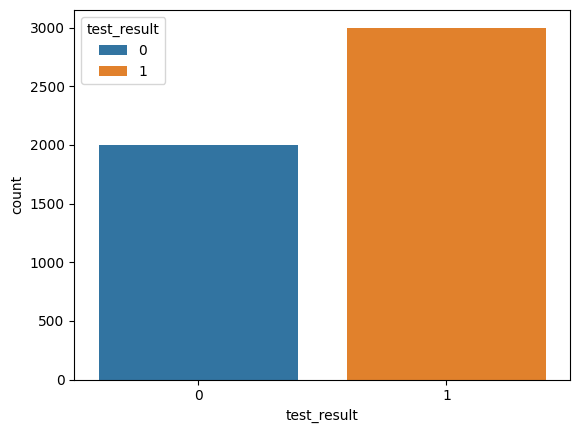

In [5]:
sns.countplot(data=data , x='test_result' , hue='test_result')

<Axes: xlabel='test_result', ylabel='age'>

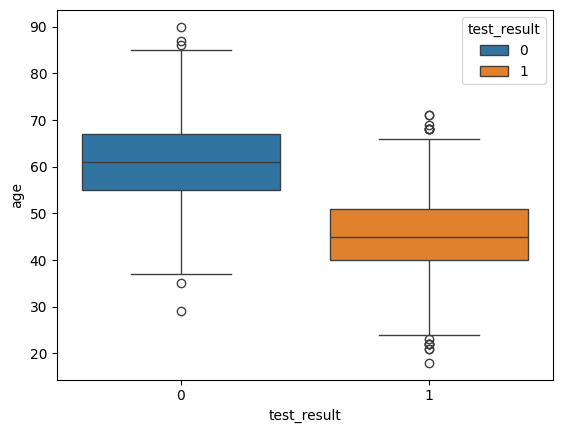

In [6]:
sns.boxplot(data=data , x='test_result' , y='age' , hue='test_result')

<Axes: xlabel='test_result', ylabel='physical_score'>

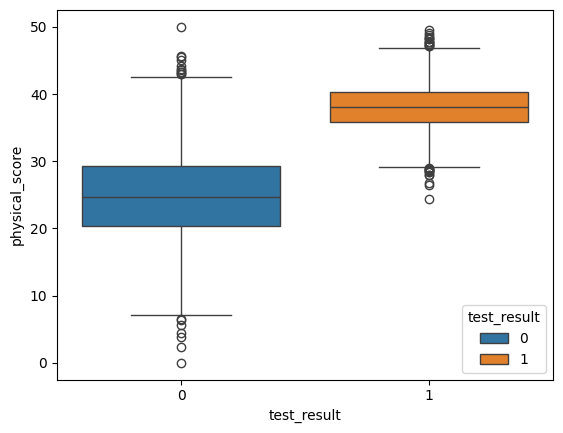

In [7]:
sns.boxplot(data=data , x='test_result' , y='physical_score' , hue='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

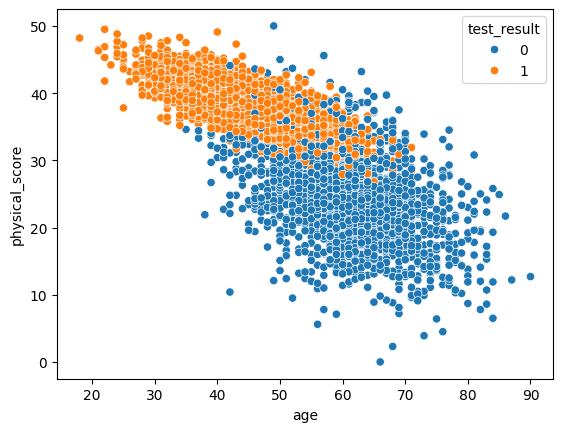

In [8]:
sns.scatterplot(data=data , x='age' , y='physical_score' , hue='test_result')

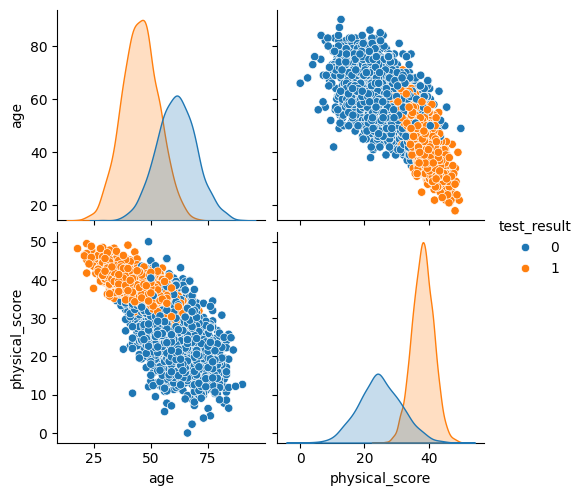

In [9]:
sns.pairplot(data=data , hue='test_result')

<Axes: >

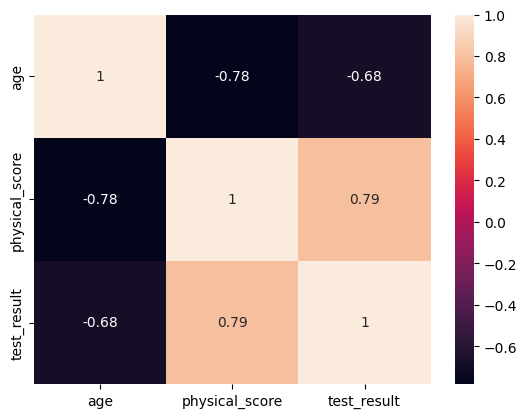

In [10]:
sns.heatmap(data=data.corr() , annot=True)

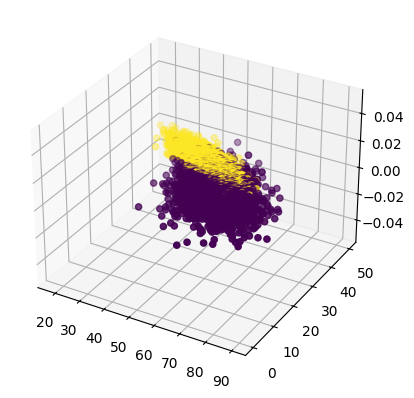

In [11]:
# 3-D plot

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax = fig.add_subplot(111 , projection='3d')
ax.scatter(data['age'] , data['physical_score'] , c=data['test_result'])


In [12]:
X = data.drop('test_result' , axis=1)
y = data['test_result']

- Creating Logicstic Regression Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train , y_train)

print(model.coef_)

[[-0.91916047  3.53009087]]


In [15]:
y_pred = model.predict(X_test) # Prediction in '0' or '1'
y_pred = model.predict_proba(X_test) # returns probabilities of datapoint belonging to a specific class
y_pred = model.predict_log_proba(X_test) # returns log() of probability

In [16]:
from sklearn.metrics import accuracy_score , confusion_matrix ,  classification_report , precision_score , recall_score 
# classification report contains precision , recall and f1-score

y_pred = model.predict(X_test)

# Accuracy Score
print(accuracy_score(y_test , y_pred))

# Confusion Matix
print(confusion_matrix(y_test , y_pred))

# Classification Report
print(classification_report(y_test , y_pred))

0.906
[[161  30]
 [ 17 292]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       191
           1       0.91      0.94      0.93       309

    accuracy                           0.91       500
   macro avg       0.91      0.89      0.90       500
weighted avg       0.91      0.91      0.91       500

